In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/winequality-red.csv')
print(dataset,dataset.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
print("Type of dataset:", type(dataset))
print("Dataset head:\n", dataset.head())


Type of dataset: <class 'pandas.core.frame.DataFrame'>
Dataset head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  qual

In [4]:
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
dataset = dataset.dropna()

In [6]:
dataset['target'] = (dataset['quality'] >=6).astype(int)

In [7]:
X = dataset.drop(['quality', 'target'], axis=1)
y = dataset['target']


Histogram

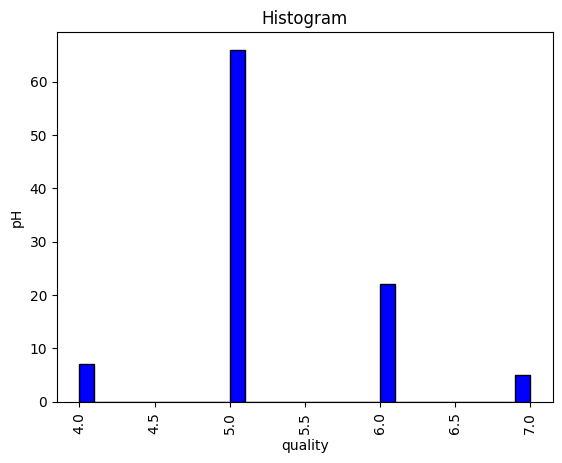

In [8]:
plt.hist(dataset['quality'].head(100), bins=30,
color='blue', edgecolor='black')
plt.title('Histogram')
plt.xticks(rotation=90)
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

In [9]:
data=dataset.iloc[:,0:11]
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [10]:
target=dataset['target']
print(target)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: target, Length: 1599, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

print(test_data,test_data.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1393            8.0              0.52         0.25             2.0      0.078   
418            11.9              0.38         0.51             2.0      0.121   
551             9.4              0.43         0.24             2.8      0.092   
866             6.8              0.49         0.22             2.3      0.071   
259            10.0              0.31         0.47             2.6      0.085   
...             ...               ...          ...             ...        ...   
862             7.5              0.42         0.32             2.7      0.067   
493             8.7              0.69         0.31             3.0      0.086   
841             6.6              0.66         0.00             3.0      0.115   
785             9.9              0.35         0.41             2.3      0.083   
1368            8.0              0.77         0.32             2.1      0.079   

      free sulfur dioxide  

In [12]:

print(test_target,test_target.shape)

1393    0
418     1
551     1
866     1
259     1
       ..
862     0
493     1
841     0
785     0
1368    1
Name: target, Length: 320, dtype: int64 (320,)


In [13]:
from sklearn.svm import SVC
model=SVC(kernel='linear',degree=2)


In [14]:
model.fit(train_data,train_target)

,C,1.0
,kernel,'linear'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
predicted_target=model.predict(test_data)

print('Predicted Target: ',predicted_target)



Predicted Target:  [0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0]


In [16]:
print('test target :',test_target)

test target : 1393    0
418     1
551     1
866     1
259     1
       ..
862     0
493     1
841     0
785     0
1368    1
Name: target, Length: 320, dtype: int64


In [17]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print('accuracy_score: ',acc)

accuracy_score:  0.728125


RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(random_state=42)

In [19]:
model_2.fit(train_data,train_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
predicted_target=model_2.predict(test_data)

print('Predicted Target: ',predicted_target)

Predicted Target:  [1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0]


In [21]:
print('test target :',test_target)

test target : 1393    0
418     1
551     1
866     1
259     1
       ..
862     0
493     1
841     0
785     0
1368    1
Name: target, Length: 320, dtype: int64


In [22]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print('accuracy_score: ',acc)

accuracy_score:  0.765625


In [23]:
import pickle

In [24]:
with open('model_pickle_2','wb') as f:
    pickle.dump(model_2,f)

In [25]:
with open('model_pickle_2','rb') as f:
     model_2 = pickle.load(f)

In [26]:
sample_data = np.array([[7.3, 0.65, 0.0, 1.2, 0.065,
                         15.0, 21.0, 0.9946, 3.39,
                         0.47, 10]])

In [27]:
predicted_quality = model_2.predict(sample_data)

print("Predicted Wine Quality:", predicted_quality[0])

Predicted Wine Quality: 1


c:\Users\Yasiru\anaconda3\envs\yasiru\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
import sklearn
print(sklearn.__version__)


1.7.1


In [29]:
import sklearn
print(sklearn.__version__)



1.7.1


In [30]:
import matplotlib
print(matplotlib.__version__)


3.10.5
